## Building a Simple Linear Model

simple linear regression model using TensorFlow Variables and Constants.

In [1]:
import tensorflow as tf

# Define Constants for input data
X = tf.constant([[1.0], [2.0], [3.0], [4.0]], dtype=tf.float32)  # Input features
Y = tf.constant([[2.0], [4.0], [6.0], [8.0]], dtype=tf.float32)  # Target values

# Define Variables for model parameters (weights and bias)
W = tf.Variable([[0.0]], dtype=tf.float32, name='weight')
b = tf.Variable([0.0], dtype=tf.float32, name='bias')

# Define the linear model
def linear_model(X):
    return tf.matmul(X, W) + b

# Define the loss function (Mean Squared Error)
def loss_fn(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Define the optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Training loop
for epoch in range(1000):
    with tf.GradientTape() as tape:
        y_pred = linear_model(X)
        loss = loss_fn(y_pred, Y)
    
    # Compute gradients
    gradients = tape.gradient(loss, [W, b])
    
    # Update variables
    optimizer.apply_gradients(zip(gradients, [W, b]))
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.numpy()}, W = {W.numpy()}, b = {b.numpy()}")

# Final model parameters
print("Trained Weights:", W.numpy())
print("Trained Bias:", b.numpy())

Epoch 0: Loss = 30.0, W = [[0.29999998]], b = [0.09999999]
Epoch 100: Loss = 0.03408462926745415, W = [[1.8468075]], b = [0.45040485]
Epoch 200: Loss = 0.01871202513575554, W = [[1.8864939]], b = [0.33372158]
Epoch 300: Loss = 0.010272667743265629, W = [[1.9158992]], b = [0.24726659]
Epoch 400: Loss = 0.005639577750116587, W = [[1.9376867]], b = [0.18320896]
Epoch 500: Loss = 0.0030960547737777233, W = [[1.9538298]], b = [0.13574634]
Epoch 600: Loss = 0.001699708285741508, W = [[1.9657906]], b = [0.10057957]
Epoch 700: Loss = 0.0009331251494586468, W = [[1.974653]], b = [0.0745233]
Epoch 800: Loss = 0.0005122720031067729, W = [[1.9812194]], b = [0.05521719]
Epoch 900: Loss = 0.00028123249649070203, W = [[1.9860847]], b = [0.04091255]
Trained Weights: [[1.9896587]]
Trained Bias: [0.03040474]


# Operations and Sessions

In [1]:
import tensorflow as tf

print("--- Mathematical Operations ---")
# Define two constant tensors
a = tf.constant(10.0, dtype=tf.float32)
b = tf.constant(3.0, dtype=tf.float32)
matrix_a = tf.constant([[1.0, 2.0], [3.0, 4.0]], dtype=tf.float32)
matrix_b = tf.constant([[5.0, 6.0], [7.0, 8.0]], dtype=tf.float32)

# Addition
c_add = tf.add(a, b)
print(f"Addition (a + b): {c_add.numpy()}") # .numpy() to get Python value

# Subtraction
c_sub = tf.subtract(a, b)
print(f"Subtraction (a - b): {c_sub.numpy()}")

# Multiplication (element-wise)
c_mul = tf.multiply(a, b)
print(f"Multiplication (a * b): {c_mul.numpy()}")

# Division (element-wise)
c_div = tf.divide(a, b)
print(f"Division (a / b): {c_div.numpy()}")

# Matrix Multiplication
c_matmul = tf.matmul(matrix_a, matrix_b)
print(f"Matrix Multiplication (matrix_a @ matrix_b):\n{c_matmul.numpy()}")

# Power
c_pow = tf.pow(a, 2) # a^2
print(f"Power (a^2): {c_pow.numpy()}")

# Square Root
c_sqrt = tf.sqrt(a)
print(f"Square Root (sqrt(a)): {c_sqrt.numpy()}")

print("\n--- Logical Operations ---")
x = tf.constant(5)
y = tf.constant(10)
z = tf.constant(5)

# Equal
comp_equal = tf.equal(x, z)
print(f"Is x equal to z? {comp_equal.numpy()}")

# Greater
comp_greater = tf.greater(y, x)
print(f"Is y greater than x? {comp_greater.numpy()}")

# Logical AND
bool_a = tf.constant(True)
bool_b = tf.constant(False)
logical_and_result = tf.logical_and(bool_a, bool_b)
print(f"Logical AND (True and False): {logical_and_result.numpy()}")

# Logical OR
logical_or_result = tf.logical_or(bool_a, bool_b)
print(f"Logical OR (True or False): {logical_or_result.numpy()}")

print("\n--- Data Manipulation Operations ---")
original_tensor = tf.constant([[1, 2, 3], [4, 5, 6]], dtype=tf.int32)
print(f"Original Tensor:\n{original_tensor.numpy()}")

# Reshaping
reshaped_tensor = tf.reshape(original_tensor, [3, 2]) # From [2,3] to [3,2]
print(f"Reshaped Tensor to [3,2]:\n{reshaped_tensor.numpy()}")

# Slicing
sliced_tensor = original_tensor[0, 1:] # Row 0, columns from index 1 to end
print(f"Sliced Tensor (row 0, columns 1:):\n{sliced_tensor.numpy()}")

# Concatenation
tensor1 = tf.constant([[10, 20]], dtype=tf.int32)
tensor2 = tf.constant([[30, 40]], dtype=tf.int32)
concatenated_rows = tf.concat([tensor1, tensor2], axis=0) # Concatenate along rows
print(f"Concatenated (axis=0):\n{concatenated_rows.numpy()}")

concatenated_cols = tf.concat([tf.constant([1], dtype=tf.int32), tf.constant([2], dtype=tf.int32)], axis=0)
print(f"Concatenated (single-dim, axis=0): {concatenated_cols.numpy()}")

# Expanding dimensions (adding a new axis)
expanded_tensor = tf.expand_dims(original_tensor, axis=0) # Adds a new dimension at index 0
print(f"Expanded Tensor (axis=0, shape: {expanded_tensor.shape}):\n{expanded_tensor.numpy()}")

# Reducing dimensions (e.g., sum, mean)
sum_all = tf.reduce_sum(original_tensor)
print(f"Sum of all elements: {sum_all.numpy()}")
mean_rows = tf.reduce_mean(original_tensor, axis=1) # Mean across rows
print(f"Mean across rows: {mean_rows.numpy()}")


print("\n--- Variable Operations ---")
# Define a Variable
my_variable = tf.Variable(5.0, dtype=tf.float32, name="my_var")
print(f"Initial Variable value: {my_variable.numpy()}")

# Assign a new value
my_variable.assign(7.5)
print(f"Variable value after assign: {my_variable.numpy()}")

# Perform an operation and assign the result
new_value = tf.constant(2.0)
my_variable.assign_add(new_value) # my_variable = my_variable + new_value
print(f"Variable value after assign_add: {my_variable.numpy()}")

# Variables are trainable by default and tracked by GradientTape
# (Demonstrated in the linear regression example previously)

print("\n--- Control Flow Operations (Conditional Example) ---")

# tf.cond is used for conditional execution in TensorFlow graphs.
# In eager execution (default in TensorFlow 2.x), Python's `if` is often used.
# However, tf.cond is still useful for traceable functions or specific graph contexts.

input_value = tf.constant(10)

def true_fn():
    return tf.add(input_value, 5)

def false_fn():
    return tf.subtract(input_value, 5)

# If input_value > 7, execute true_fn, else execute false_fn
conditional_result = tf.cond(tf.greater(input_value, 7), true_fn, false_fn)
print(f"Conditional result (if input_value > 7 then add 5 else subtract 5): {conditional_result.numpy()}")

input_value_2 = tf.constant(3)
conditional_result_2 = tf.cond(tf.greater(input_value_2, 7), true_fn, false_fn)
print(f"Conditional result 2 (if input_value_2 > 7 then add 5 else subtract 5): {conditional_result_2.numpy()}")

--- Mathematical Operations ---
Addition (a + b): 13.0
Subtraction (a - b): 7.0
Multiplication (a * b): 30.0
Division (a / b): 3.3333332538604736
Matrix Multiplication (matrix_a @ matrix_b):
[[19. 22.]
 [43. 50.]]
Power (a^2): 100.0
Square Root (sqrt(a)): 3.1622776985168457

--- Logical Operations ---
Is x equal to z? True
Is y greater than x? True
Logical AND (True and False): False
Logical OR (True or False): True

--- Data Manipulation Operations ---
Original Tensor:
[[1 2 3]
 [4 5 6]]
Reshaped Tensor to [3,2]:
[[1 2]
 [3 4]
 [5 6]]
Sliced Tensor (row 0, columns 1:):
[2 3]
Concatenated (axis=0):
[[10 20]
 [30 40]]
Concatenated (single-dim, axis=0): [1 2]
Expanded Tensor (axis=0, shape: (1, 2, 3)):
[[[1 2 3]
  [4 5 6]]]
Sum of all elements: 21
Mean across rows: [2 5]

--- Variable Operations ---
Initial Variable value: 5.0
Variable value after assign: 7.5
Variable value after assign_add: 9.5

--- Control Flow Operations (Conditional Example) ---
Conditional result (if input_value > 7

#### A Session in TensorFlow (specifically in TensorFlow 1.x) is an environment that encapsulates the execution of the computational graph. Sessions manage the allocation of resources (like memory and devices) and execute operations within the graph, providing the means to run computations and retrieve results.

In [5]:
import tensorflow as tf

# Define two constant tensors
a = tf.constant(2.0)
b = tf.constant(3.0)

# Define an addition operation
c = tf.add(a, b)

# In TensorFlow 2.x, operations are executed eagerly.
# To get the Python value from a TensorFlow tensor, use .numpy().
print("Result:", c.numpy())

Result: 5.0


In [8]:
import tensorflow as tf

# Define Variables for model parameters (weights and bias)
# In TF2, Variables are initialized when created.
W = tf.Variable([0.3], dtype=tf.float32, name='weight')
b = tf.Variable([-0.3], dtype=tf.float32, name='bias')

# Define the linear model function
# In TF2, you define operations as regular Python functions
# that accept tensors as input. No placeholders needed.
def linear_model(X_input):
    return W * X_input + b

# Define the loss function (Mean Squared Error)
def loss_fn(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Define an optimizer
# TF2 optimizers are typically found under tf.optimizers or tf.keras.optimizers
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Training data (convert to TensorFlow tensors directly, as they won't change)
# It's good practice to make sure your input data is floating-point
train_X = tf.constant([1.0, 2.0, 3.0, 4.0], dtype=tf.float32)
train_Y = tf.constant([0.0, -1.0, -2.0, -3.0], dtype=tf.float32)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Use tf.GradientTape for automatic differentiation
    with tf.GradientTape() as tape:
        # Calculate predictions using the current model parameters
        y_pred = linear_model(train_X)
        
        # Calculate the loss
        current_loss = loss_fn(y_pred, train_Y)
    
    # Compute gradients of the loss with respect to W and b
    gradients = tape.gradient(current_loss, [W, b])
    
    # Apply gradients to update W and b
    optimizer.apply_gradients(zip(gradients, [W, b]))
    
    # Print progress every 100 epochs
    if epoch % 100 == 0:
        # Use .numpy() to get the scalar value for printing
        print(f"Epoch {epoch}: Loss = {current_loss.numpy()}, W = {W.numpy()}, b = {b.numpy()}")

print("\n--- Training Complete ---")
# Get final values for W, b, and calculate final loss
final_W = W.numpy()
final_b = b.numpy()

# Calculate final loss using the entire dataset and the final model parameters
final_predictions = linear_model(train_X)
final_loss_value = loss_fn(final_predictions, train_Y).numpy()

print(f"Trained Weight: {final_W}")
print(f"Trained Bias: {final_b}")
print(f"Final Loss: {final_loss_value}")

Epoch 0: Loss = 5.914999961853027, W = [0.17000002], b = [-0.33900002]
Epoch 100: Loss = 0.22356565296649933, W = [-0.60766166], b = [-0.1535226]
Epoch 200: Loss = 0.12273482233285904, W = [-0.7093019], b = [0.14531225]
Epoch 300: Loss = 0.06737996637821198, W = [-0.7846109], b = [0.3667299]
Epoch 400: Loss = 0.03699078783392906, W = [-0.84041023], b = [0.5307866]
Epoch 500: Loss = 0.020307529717683792, W = [-0.88175386], b = [0.6523421]
Epoch 600: Loss = 0.011148570105433464, W = [-0.9123871], b = [0.7424075]
Epoch 700: Loss = 0.00612042099237442, W = [-0.9350844], b = [0.80914026]
Epoch 800: Loss = 0.003360041882842779, W = [-0.9519016], b = [0.8585849]
Epoch 900: Loss = 0.0018446184694766998, W = [-0.96436214], b = [0.8952204]

--- Training Complete ---
Trained Weight: [-0.9735152]
Trained Bias: [0.92213166]
Final Loss: 0.0010126777924597263


### A Placeholder in TensorFlow was a way to feed external data into the computational graph. Placeholders acted as nodes that could accept data during the execution phase without requiring the data to be part of the graph definition. This separation allowed for greater flexibility in feeding different datasets into the same graph structure

TensorFlow 2.x offers several alternatives to Placeholders that provide enhanced flexibility, simplicity, and integration with Eager Execution:

In [13]:
# se tf.keras.Input or tf.keras.layers.Input to define input tensors in Keras models.
from tensorflow.keras.layers import Input
input_layer = Input(shape=(784,), name='input_layer')

In [15]:
#Directly pass data to functions and models without the need for placeholders.
import tensorflow as tf

# Example 1: `add` is a simple Python function
def add_numbers(a, b):
    # If a and b are Tensors, this will perform Tensor addition
    return a + b

# Convert inputs to TensorFlow Tensors
tensor_a = tf.constant(2.0)
tensor_b = tf.constant(3.0)

# Execute the operation with TensorFlow Tensors
result_tensor = add_numbers(tensor_a, tensor_b)

# Now result_tensor is a TensorFlow Tensor, and you can use .numpy()
print(result_tensor.numpy())  # Output: 5.0

5.0


Decorate Python functions with @tf.function to compile them into optimized TensorFlow graphs, allowing for dynamic and flexible data inputs.

In [16]:
import tensorflow as tf

# Example 2: `add` is a TensorFlow function
@tf.function
def tf_add(a, b):
    return a + b

# Convert inputs to TensorFlow Tensors
tensor_a = tf.constant(2.0)
tensor_b = tf.constant(3.0)

# Execute the TensorFlow function with Tensors
result_tf_function = tf_add(tensor_a, tensor_b)

# Now result_tf_function is a TensorFlow Tensor
print(result_tf_function.numpy()) # Output: 5.0

# Alternatively, if you pass Python floats to a tf.function,
# TensorFlow will often convert them to Tensors internally for graph execution,
# and the return value will be a Tensor.
result_direct_floats = tf_add(2.0, 3.0)
print(result_direct_floats.numpy()) # This will also work because tf_add converts inputs

5.0
5.0


In [17]:
# Data Pipelines with tf.data:

#Utilize the tf.data API to build efficient and scalable data input pipelines.
import tensorflow as tf

# Create a dataset
dataset = tf.data.Dataset.from_tensor_slices((train_X, train_Y))
dataset = dataset.batch(32)

# Iterate over the dataset
for batch_X, batch_Y in dataset:
    # Perform training step
    pass
    

In [18]:
#Direct Tensor Passing in Keras Models:

#Pass NumPy arrays or TensorFlow tensors directly to Keras models for training and inference.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Define a simple model
model = Sequential([
    Dense(10, activation='relu', input_shape=(784,)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Generate dummy data
X = np.random.rand(100, 784)
Y = np.random.rand(100, 1)

# Train the model
model.fit(X, Y, epochs=5)

Epoch 1/5


C:\Users\admin\tensorflow_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4305  
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3497 
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3218 
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2002 
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1609 


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Define a simple neural network using Keras
model = Sequential([
    Dense(10, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.5),
              loss='categorical_crossentropy')

# Generate dummy data
X_train = np.random.rand(1000, 784)
Y_train = tf.keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)

# --- Custom Callback for Controlled Output ---
# Define the interval at which you want to print updates
display_interval = 50

# Create a LambdaCallback
# This callback will be called at the end of each epoch
log_epoch_callback = tf.keras.callbacks.LambdaCallback(
    on_epoch_end=lambda epoch, logs:
        # Check if the current epoch is a multiple of the display_interval, or the very first epoch
        # (epoch is 0-indexed, so add 1 for user-friendly display)
        print(f"Epoch {epoch + 1}/{model.history.params['epochs']} - loss: {logs['loss']:.4f}")
        if (epoch + 1) % display_interval == 0 or epoch == 0
        else None
)

# Train the model with the custom callback
# Set verbose=0 to suppress Keras's default per-epoch output,
# as our callback will handle the printing.
print(f"Training started. Displaying progress every {display_interval} epochs...\n")
history = model.fit(X_train, Y_train,
                    epochs=1000,
                    batch_size=32,
                    verbose=0, # Crucial: Suppress default Keras output
                    callbacks=[log_epoch_callback]) # Pass your custom callback here

print("\nTraining complete!")

C:\Users\admin\tensorflow_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training started. Displaying progress every 50 epochs...

Epoch 1/1000 - loss: 2.3909
Epoch 50/1000 - loss: 2.3040
Epoch 100/1000 - loss: 2.3057
Epoch 150/1000 - loss: 2.3040
Epoch 200/1000 - loss: 2.3038
Epoch 250/1000 - loss: 2.3051
Epoch 300/1000 - loss: 2.3039
Epoch 350/1000 - loss: 2.3039
Epoch 400/1000 - loss: 2.3043
Epoch 450/1000 - loss: 2.3042
Epoch 500/1000 - loss: 2.3049
Epoch 550/1000 - loss: 2.3051
Epoch 600/1000 - loss: 2.3050
Epoch 650/1000 - loss: 2.3049
Epoch 700/1000 - loss: 2.3049
Epoch 750/1000 - loss: 2.3046
Epoch 800/1000 - loss: 2.3040
Epoch 850/1000 - loss: 2.3050
Epoch 900/1000 - loss: 2.3033
Epoch 950/1000 - loss: 2.3035
Epoch 1000/1000 - loss: 2.3035

Training complete!


In [3]:
# What is an Activation Function?
#An activation function determines the output of a neuron given a set of inputs.
#It takes the weighted sum of inputs and applies a non-linear transformation, allowing the network to learn complex patterns in the data


--- Sigmoid Function Visualization ---


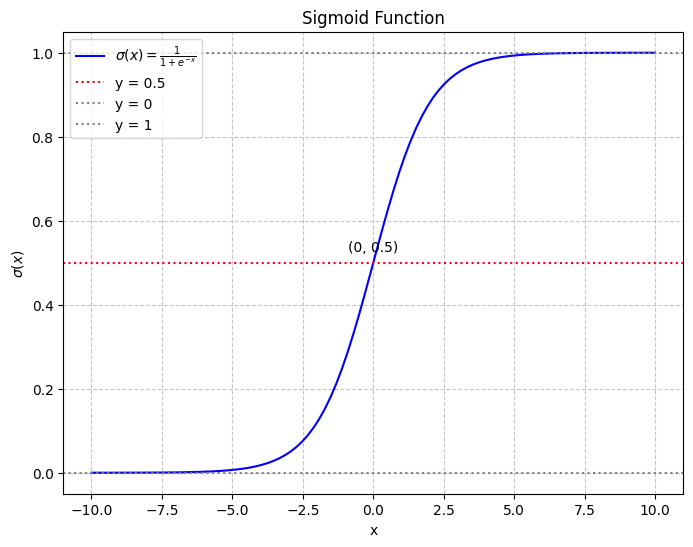

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# --- SIGMOID FUNCTION DEFINITION (THIS IS WHAT WAS MISSING OR NOT EXECUTED) ---
def sigmoid_numpy(x):
    """
    Implements the sigmoid function using NumPy for vectorized operations.
    Formula: sigma(x) = 1 / (1 + e^(-x))
    """
    return 1 / (1 + np.exp(-x))
# -----------------------------------------------------------------------------

print("\n--- Sigmoid Function Visualization ---")
x = np.linspace(-10, 10, 100) # Generate 100 points between -10 and 10
y = sigmoid_numpy(x) # Now sigmoid_numpy is defined!

plt.figure(figsize=(8, 6))
# Use raw string (r"...") for the label to avoid SyntaxWarning
plt.plot(x, y, label=r'$\sigma(x) = \frac{1}{1 + e^{-x}}$', color='blue')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel(r'$\sigma(x)$') # Use raw string for ylabel
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0.5, color='r', linestyle=':', label='y = 0.5')
plt.axhline(y=0, color='gray', linestyle=':', label='y = 0')
plt.axhline(y=1, color='gray', linestyle=':', label='y = 1')
plt.text(0, 0.52, '(0, 0.5)', horizontalalignment='center', verticalalignment='bottom')
plt.legend()
plt.show()

# You can also add your TensorFlow/Keras note here if desired
# try:
#     import tensorflow as tf
#     tf_tensor_x = tf.constant([-5.0, 0.0, 5.0])
#     tf_sigmoid_output = tf.math.sigmoid(tf_tensor_x)
#     print(f"\nTensorFlow Sigmoid: {tf_sigmoid_output.numpy()}")
# except ImportError:
#     print("TensorFlow not installed. Skipping TensorFlow example.")

--- Tanh Function Examples ---
tanh(0)   = 0.0000
tanh(np.array([-3, 0, 3])) = [-0.99505475  0.          0.99505475]


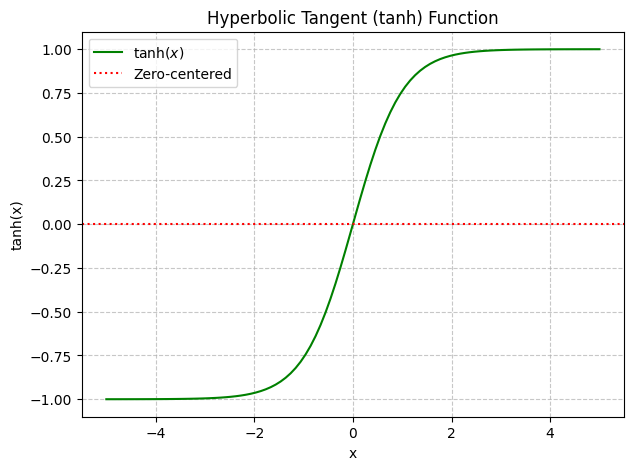

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# --- Tanh Function (NumPy - Recommended) ---
def tanh(x):
    """
    Implements the hyperbolic tangent (tanh) function using NumPy.
    Formula: tanh(x) = (e^x - e^(-x)) / (e^x + e^(-x))
    Outputs values between -1 and 1.
    """
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

print("--- Tanh Function Examples ---")
print(f"tanh(0)   = {tanh(0):.4f}")
print(f"tanh(np.array([-3, 0, 3])) = {tanh(np.array([-3, 0, 3]))}")

# --- # <-- This line was causing the error. Now it's a comment.

# --- Basic Tanh Visualization ---
x_plot = np.linspace(-5, 5, 100)
y_plot = tanh(x_plot)

plt.figure(figsize=(7, 5))
plt.plot(x_plot, y_plot, label=r'$\tanh(x)$', color='green')
plt.title('Hyperbolic Tangent (tanh) Function')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0, color='r', linestyle=':', label='Zero-centered')
plt.legend()
plt.show()



--- ReLU Function Examples ---
relu(-5) = 0.0000
relu(0)  = 0.0000
relu(5)  = 5.0000
relu(np.array([-3, 0, 3])) = [0 0 3]


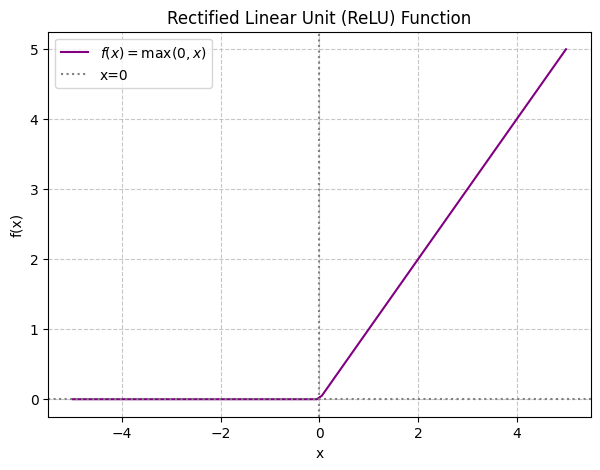

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# --- ReLU Function (NumPy - Recommended) ---
def relu(x):
    """
    Implements the Rectified Linear Unit (ReLU) function using NumPy.
    Formula: f(x) = max(0, x)
    Outputs 0 for negative inputs, and the input value for positive inputs.
    """
    return np.maximum(0, x) # np.maximum is vectorized

print("--- ReLU Function Examples ---")
print(f"relu(-5) = {relu(-5):.4f}") # Should be 0
print(f"relu(0)  = {relu(0):.4f}")  # Should be 0
print(f"relu(5)  = {relu(5):.4f}")  # Should be 5
print(f"relu(np.array([-3, 0, 3])) = {relu(np.array([-3, 0, 3]))}")

# --- Basic ReLU Visualization ---
x_plot = np.linspace(-5, 5, 100) # 100 points from -5 to 5
y_plot = relu(x_plot)

plt.figure(figsize=(7, 5))
plt.plot(x_plot, y_plot, label=r'$f(x) = \max(0, x)$', color='purple')
plt.title('Rectified Linear Unit (ReLU) Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(x=0, color='gray', linestyle=':', label='x=0') # Show the kink at 0
plt.axhline(y=0, color='gray', linestyle=':')
plt.legend()
plt.show()



--- Leaky ReLU Function Examples ---
leaky_relu(-5) = -0.0500
leaky_relu(0)  = 0.0000
leaky_relu(5)  = 5.0000
leaky_relu(np.array([-3, 0, 3]), alpha=0.1) = [-0.3  0.   3. ]


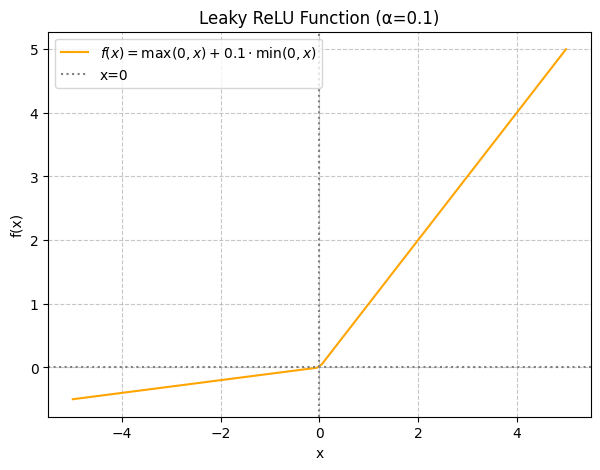

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- Leaky ReLU Function (NumPy - Recommended) ---
def leaky_relu(x, alpha=0.01):
    """
    Implements the Leaky Rectified Linear Unit (Leaky ReLU) function using NumPy.
    Formula: f(x) = x if x > 0, else alpha * x
    alpha is a small constant (defaulting to 0.01).
    Range: (-infinity, infinity)
    """
    return np.where(x > 0, x, alpha * x)
    # np.where(condition, x_if_true, y_if_false) is vectorized

print("--- Leaky ReLU Function Examples ---")
print(f"leaky_relu(-5) = {leaky_relu(-5):.4f}") # Should be -5 * 0.01 = -0.05
print(f"leaky_relu(0)  = {leaky_relu(0):.4f}")  # Should be 0 (or very close to 0 * alpha)
print(f"leaky_relu(5)  = {leaky_relu(5):.4f}")  # Should be 5
print(f"leaky_relu(np.array([-3, 0, 3]), alpha=0.1) = {leaky_relu(np.array([-3, 0, 3]), alpha=0.1)}")

# --- Basic Leaky ReLU Visualization ---
x_plot = np.linspace(-5, 5, 100) # 100 points from -5 to 5
alpha_val = 0.1 # Using a slightly larger alpha for clearer visualization
y_plot = leaky_relu(x_plot, alpha=alpha_val)

plt.figure(figsize=(7, 5))
plt.plot(x_plot, y_plot, label=rf'$f(x) = \max(0, x) + {alpha_val} \cdot \min(0, x)$', color='orange')
plt.title(f'Leaky ReLU Function (α={alpha_val})')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(x=0, color='gray', linestyle=':', label='x=0') # Show the kink at 0
plt.axhline(y=0, color='gray', linestyle=':')
plt.legend()
plt.show()



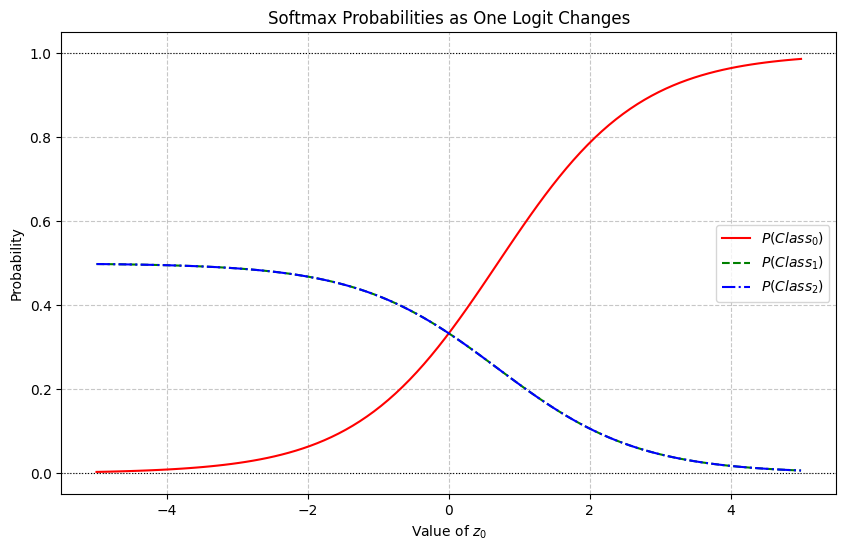

Softmax([5.0, 0.0, 0.0]) = [0.9867 0.0066 0.0066]
Softmax([-5.0, 0.0, 0.0]) = [0.0034 0.4983 0.4983]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(z):
    exp_z = np.exp(z - np.max(z))
    return exp_z / np.sum(exp_z, axis=0)

# Plotting behavior for 3 classes
z0_values = np.linspace(-5, 5, 100)
z1_const = 0.0
z2_const = 0.0

all_logits = np.vstack([z0_values,
                         np.full_like(z0_values, z1_const),
                         np.full_like(z0_values, z2_const)])

probabilities = softmax(all_logits)

plt.figure(figsize=(10, 6))
plt.plot(z0_values, probabilities[0, :], label=r'$P(Class_0)$', color='red')
plt.plot(z0_values, probabilities[1, :], label=r'$P(Class_1)$', color='green', linestyle='--')
plt.plot(z0_values, probabilities[2, :], label=r'$P(Class_2)$', color='blue', linestyle='-.')

plt.title('Softmax Probabilities as One Logit Changes')
plt.xlabel(r'Value of $z_0$')
plt.ylabel('Probability')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0, color='black', linestyle=':', linewidth=0.8)
plt.axhline(y=1, color='black', linestyle=':', linewidth=0.8)
plt.legend()
plt.ylim(-0.05, 1.05)
plt.show()

# Example output
print(f"Softmax([5.0, 0.0, 0.0]) = {softmax(np.array([5.0, 0.0, 0.0])).round(4)}")
print(f"Softmax([-5.0, 0.0, 0.0]) = {softmax(np.array([-5.0, 0.0, 0.0])).round(4)}")

. Mean Squared Error (MSE):
Mean Squared Error (MSE) is one of the most common loss functions for regression tasks. It calculates the average squared difference between the predicted values and the true values, making it highly sensitive to large errors.

**Formula:**

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
 



In [1]:
import numpy as np

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Example
y_true = np.array([3.0, -0.5, 2.0, 7.0])
y_pred = np.array([2.5, 0.0, 2.0, 8.0])

mse = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.375


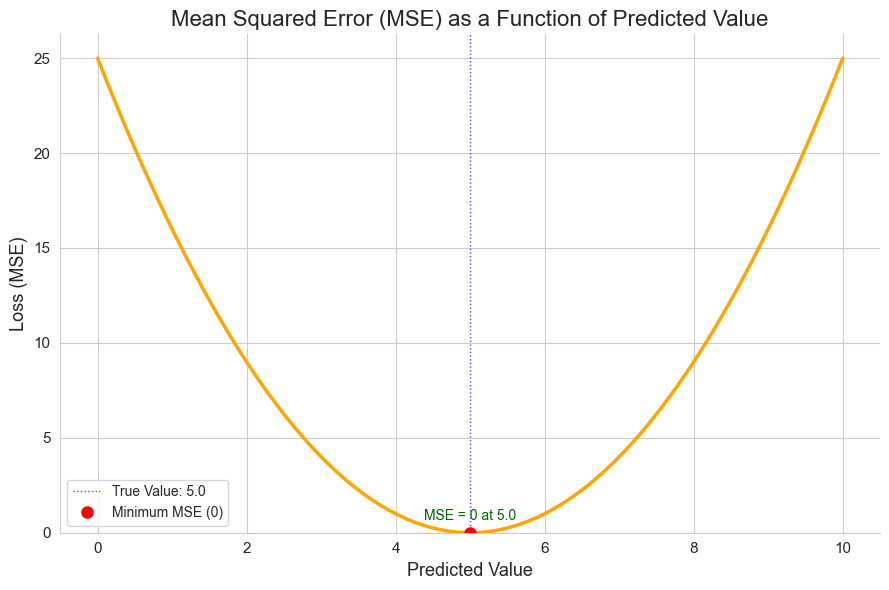

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Optional: for nicer plot aesthetics

# --- Data for the plot ---
# Assume a single true value for demonstration
true_value = 5.0 # You can change this true value to see how the parabola shifts

# Generate a range of predicted values
# We'll go from true_value - 5 to true_value + 5, with 100 points
predicted_values = np.linspace(true_value - 5, true_value + 5, 100)

# Calculate the Mean Squared Error (MSE) for each predicted value
# For a single data point, MSE is simply the squared error.
mse_values = (true_value - predicted_values) ** 2

# --- Plotting ---

# Set a nice style using Seaborn (optional, remove if you don't have seaborn or prefer default matplotlib)
sns.set_style("whitegrid")

plt.figure(figsize=(9, 6)) # Adjust figure size as needed

# Plot the MSE curve
plt.plot(predicted_values, mse_values, color='orange', linewidth=2.5)

# Add a horizontal line at the minimum MSE (which is 0, when predicted_value == true_value)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)

# Add a vertical line at the true value (where MSE is minimized)
plt.axvline(true_value, color='blue', linestyle=':', linewidth=1.0, alpha=0.7, label=f'True Value: {true_value}')

# Annotate the minimum point
plt.plot(true_value, 0, 'ro', markersize=8, label='Minimum MSE (0)') # Red circle at the minimum
plt.text(true_value, 0.5, f'MSE = 0 at {true_value}',
         horizontalalignment='center', verticalalignment='bottom',
         fontsize=10, color='darkgreen')

# Titles and labels
plt.title('Mean Squared Error (MSE) as a Function of Predicted Value', fontsize=16)
plt.xlabel('Predicted Value', fontsize=13)
plt.ylabel('Loss (MSE)', fontsize=13)

# Customize ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Ensure y-axis starts at 0, as MSE cannot be negative
plt.ylim(bottom=0)

# Add a legend
plt.legend(fontsize=10)

# Remove top and right spines for a cleaner look (similar to the provided image)
sns.despine()

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()

## 2. Mean Absolute Error (MAE)

Mean Absolute Error (MAE) is another common loss function for regression tasks. It measures the average of the absolute differences between predicted values and actual values, making it more robust to outliers than MSE.

**Formula:**

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_{\text{true}_i} - y_{\text{pred}_i}|
$$

In [5]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Example
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error: {mae}')
#MAE is preferred when you want to treat all errors equally and reduce the effect of outliers.
#It’s useful in regression tasks where absolute error is a more meaningful measure than squared error.

Mean Absolute Error: 0.5


## 3. Huber Loss

Huber Loss combines both MSE and MAE, making it less sensitive to outliers than MSE and more stable than MAE. It behaves like MSE when the error is small and like MAE when the error is large.

**Formula:**

$$
L_{\delta}(a) =
\begin{cases}
    \frac{1}{2}a^2 & \text{if } |a| \leq \delta, \\
    \delta(|a| - \frac{1}{2}\delta) & \text{otherwise}.
\end{cases}
$$

In [6]:
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * np.square(error)
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.mean(np.where(is_small_error, squared_loss, linear_loss))

# Example
huber = huber_loss(y_true, y_pred, delta=1.0)
print(f'Huber Loss: {huber}')

Huber Loss: 0.1875


## 4. Binary Cross-Entropy Loss

Binary Cross-Entropy Loss is used for binary classification problems. It measures the performance by comparing the predicted probability distribution with the actual binary labels.

**Formula:**

$$
\text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]
$$

In [7]:
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15  # To prevent log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Example
y_true_binary = np.array([1, 0, 1, 1])
y_pred_binary = np.array([0.9, 0.1, 0.8, 0.7])

binary_ce = binary_cross_entropy(y_true_binary, y_pred_binary)
print(f'Binary Cross-Entropy Loss: {binary_ce}')

Binary Cross-Entropy Loss: 0.19763488164214868


## 5. Categorical Cross-Entropy Loss

Categorical Cross-Entropy Loss is used for multi-class classification problems, where the goal is to classify instances into more than two categories.

**Formula:**

$$
\text{CCE} = - \sum_{i=1}^{C} y_i \log(\hat{y}_i)
$$

In [8]:
import tensorflow as tf

y_true_cat = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
y_pred_cat = [[0.9, 0.05, 0.05], [0.1, 0.8, 0.1], [0.05, 0.05, 0.9]]

# Using TensorFlow's built-in function
cat_ce = tf.keras.losses.categorical_crossentropy(y_true_cat, y_pred_cat)
print(f'Categorical Cross-Entropy Loss: {tf.reduce_mean(cat_ce).numpy()}')

Categorical Cross-Entropy Loss: 0.14462153613567352


## 6. Hinge Loss

Hinge Loss is commonly used in Support Vector Machines (SVMs) for binary classification. It ensures a margin between the decision boundary and the data points. In essence, hinge loss penalizes misclassified data points and data points that are close to the decision boundary.

**Formula:**

$$
L(y, \hat{y}) = \max(0, 1 - y \cdot \hat{y})
$$

**Where:**
* $y$: The true label (typically -1 or +1 for binary classification).
* $\hat{y}$: The predicted score or decision function output (not necessarily a probability, can be any real number).

In [9]:
def hinge_loss(y_true, y_pred):
    return np.mean(np.maximum(0, 1 - y_true * y_pred))

# Example
y_true_hinge = np.array([1, -1, 1, -1])
y_pred_hinge = np.array([0.8, -0.7, 0.9, -0.6])

hinge = hinge_loss(y_true_hinge, y_pred_hinge)
print(f'Hinge Loss: {hinge}')

Hinge Loss: 0.25
